In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4e09b;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center; padding: 10px; color:black;"> 1. Introduction </p> 

# Introduction

<img src= "https://i0.wp.com/post.healthline.com/wp-content/uploads/2021/11/1672630-Everything-You-Need-to-Know-About-Stroke_1296x1059-1.jpg?w=1155&h=2223" width="450" height="80" align="center">

<span style="font-family: Consolas;"> A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there's a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain's tissues.</span>

<span style="font-family: Consolas;"><br>Every 4 minutes, someone dies of stroke. Every year, more than 795,000 people in the United States alone have a stroke. About 610,000 of these are first or new strokes. About 185,000 strokes—nearly 1 of 4—are in people who have had a previous stroke.<br> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.</span>



#### 1.1 Importing libraries and dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

#### 1.2 Composition of the dataset 

In [4]:
df.shape

(5110, 12)

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Let us look at the attributes present in the dataset.

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Let us understand each attribute a bit closely:


- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not


In [8]:
df.columns=df.columns.str.lower()

#### 1.3 Null Values Handling 

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df=df.fillna(np.mean(df['bmi']))
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Although there are no missing values in the dataset anymore, it is important to note at this point that the column 'smoking_status' contains values "Unknown" which means that the information is unavailable for this patient.

In [11]:
df['smoking_status'].replace('Unknown', df['smoking_status'].mode()[0], inplace=True)

### 1.4  Preparing the data

Since we do not need the 'id' column, we will drop the column from our dataset.

In [12]:
df.drop('id', axis=1, inplace=True)

In [13]:
df = df[df['gender'] != 'Other']

Let us segregate the data into numerical and categorical values.

>Categorical data refers to a data type that can be stored and identified based on the names or labels given to them. 

>Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form. 

This will help us analyze the data better.

In [14]:
numeric_data=df.loc[:,df.nunique() > 5]
cols = [col for col in df.columns if col not in numeric_data]

categorical_data=df[cols].drop('stroke',axis=1)
numeric_data=pd.DataFrame(numeric_data)
categorical_data=pd.DataFrame(categorical_data)

In [15]:
print(f'Numerical data: {list(numeric_data)}')
print(f'Categorical data: {list(categorical_data)}')

Numerical data: ['age', 'avg_glucose_level', 'bmi']
Categorical data: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4e09b;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center; padding: 10px; color:black;"> 2. Exploratory Data Analysis  </p> 

# EDA

### 2.1 Heatmap

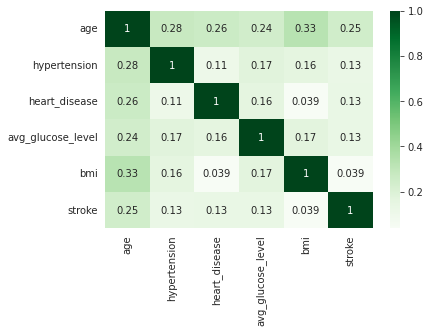

In [16]:
sns.heatmap(df.corr(), cmap = 'Greens',annot=True);

As visible from the heatmap:
- 'age' and 'bmi' are correlated fairly high. This shows that the bmi tends to increase with an increase in age.
-  'age' and 'hypertension' are also quite correlated. This is alarming for our society, as this implies poorer mental health conditions among elders.

### 2.2 Countplot

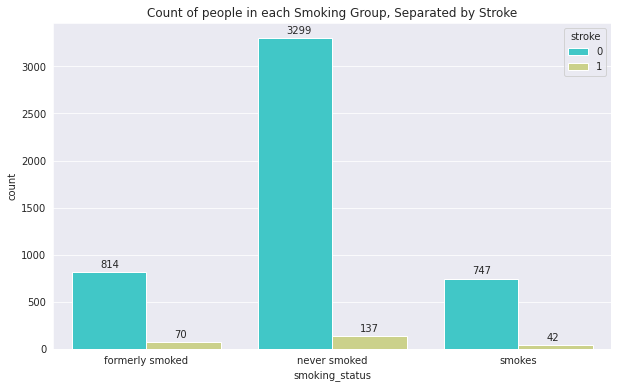

In [17]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='smoking_status',data=df, palette='rainbow',hue='stroke')
plt.title("Count of people in each Smoking Group, Separated by Stroke")
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

- People who formerly smoked and who smoke show signs of stroke way more than people who never smoked.

### 2.3 Catplot

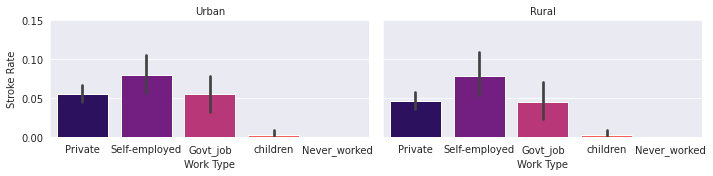

In [18]:
g = sns.catplot(x='work_type',y='stroke', col = 'residence_type', data=df, kind='bar', palette='magma', saturation =2.5)
(g.set_axis_labels("Work Type", "Stroke Rate").set_titles("{col_name}").set(ylim=(0,0.15)))
g.fig.set_figwidth(10)
g.fig.set_figheight(2)


As visible from the above:
- Living in a rural or urban areas does not affect the risk of stroke in any way.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4e09b;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center; padding: 10px; color:black;"> 3. Preprocessing  </p> 

# Preprocessing

### 3.1 Standard Scaler

This arranges the data in a standard normal distribution, with mean as 0 and standard deviation as 1.

In [19]:
num_cols=numeric_data.columns.to_list()
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051242,0,1,Yes,Private,Urban,2.706450,1.001041,formerly smoked,1
1,Female,0.785889,0,0,Yes,Self-employed,Rural,2.121652,-0.000165,never smoked,1
2,Male,1.626174,0,1,Yes,Private,Rural,-0.004867,0.468399,never smoked,1
3,Female,0.255182,0,0,Yes,Private,Urban,1.437473,0.715233,smokes,1
4,Female,1.581949,1,0,Yes,Self-employed,Rural,1.501297,-0.635858,never smoked,1


### 3.2 Label Encoding

Converting the labels into a numeric form so as to use it to fit and evaluate a model.

In [21]:
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051242,0,1,1,2,1,2.706450,1.001041,0,1
1,0,0.785889,0,0,1,3,0,2.121652,-0.000165,1,1
2,1,1.626174,0,1,1,2,0,-0.004867,0.468399,1,1
3,0,0.255182,0,0,1,2,1,1.437473,0.715233,2,1
4,0,1.581949,1,0,1,3,0,1.501297,-0.635858,1,1


### 3.3 Oversampling

> **SMOTE - Synthetic Minority Oversampling Technique** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In simpler terms, there is not much data that will help the model to learn to predict 'stroke=1' as compared to 'stroke=0', so it will tend to classify most of the test data as non-stroke.

We overcome this by using resampling.

Took help from https://www.kaggle.com/rachidyz/eda-and-modeling-for-predicting-stroke#modeling

In [23]:
training_data=df.copy()
x= training_data.drop(['stroke'],axis=1)
y= df['stroke']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train,y_train)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4e09b;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center; padding: 10px; color:black;"> 4. Modelling  </p> 

# Modelling

In [25]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
lr_f1 = f1_score(lr_pred, y_test)
lr_acc

0.7534246575342466

In [26]:
decision_tree = DecisionTreeClassifier()   
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.8405088062622309

In [27]:
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
rf_acc

0.8708414872798435

In [28]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_acc = accuracy_score(xgb_pred, y_test)
xgb_acc

[14:06:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9187866927592955

In [29]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
knn_acc

0.7749510763209393

In [30]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
lgbm_acc = accuracy_score(lgbm_pred, y_test)
lgbm_acc

0.9001956947162426

In [31]:
svm=SVC(random_state=42)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
svm_acc

0.7524461839530333

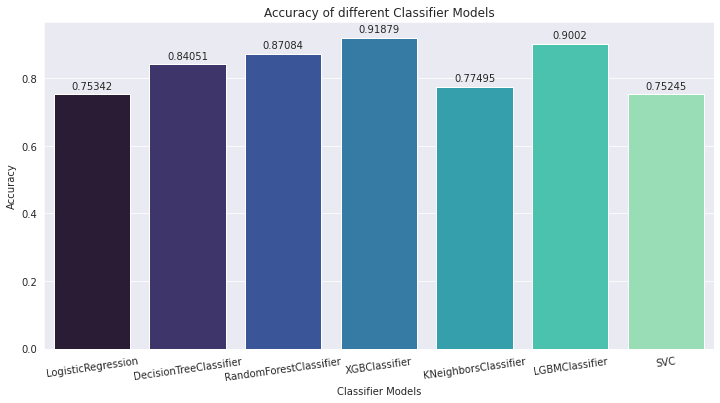

In [32]:
models_names = ["LogisticRegression",'DecisionTreeClassifier','RandomForestClassifier','XGBClassifier',
                    'KNeighborsClassifier','LGBMClassifier','SVC']
models_acc=[lr_acc,dt_acc,rf_acc,xgb_acc,knn_acc,lgbm_acc,svm_acc]

plt.rcParams['figure.figsize']=12,6
ax = sns.barplot(x=models_names, y=models_acc, palette = "mako", saturation =1.5)
plt.xlabel('Classifier Models' )
plt.ylabel('Accuracy')
plt.title('Accuracy of different Classifier Models')
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 10)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,5)}', (x + width/2, y + height*1.02), ha='center', fontsize = 10)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4e09b;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="text-align:center; padding: 10px; color:black;"> 5. Model Tuning </p> 

# Model Tuning

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. Here we apply model tuning only to XGB Classifier, as it has the highest accuracy so far.

In [33]:
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=1,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 10,
    verbose=3
)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    7.4s
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_en

[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[14:06:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=2, n_estimators=60, score=0.890, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[14:06:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=2, n_estimators=60, score=0.882, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[14:06:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   38.3s
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/


[CV]  learning_rate=0.1, max_depth=3, n_estimators=180, score=0.958, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, n_estimators=60 .................
[14:07:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=4, n_estimators=60, score=0.937, total=   0.7s
[CV] learning_rate=0.1, max_depth=4, n_estimators=60 .................
[14:07:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=4, n_estimators=60, score=0.945, total=   0.7s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[14:07:04] WARNING: ../src/learner.

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV] learning_rate=0.1, max_depth=6, n_estimators=60 .................
[14:07:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=6, n_estimators=60, score=0.975, total=   1.0s
[CV] learning_rate=0.1, max_depth=6, n_estimators=60 .................
[14:07:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=6, n_estimators=60, score=0.974, total=   1.0s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................
[14:07:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obj

[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.0min
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/


[CV]  learning_rate=0.1, max_depth=8, n_estimators=60, score=0.993, total=   1.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[14:08:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=0.997, total=   2.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[14:08:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=0.993, total=   2.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................
[14:08:22] WARNING: ../src/learner

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV] learning_rate=0.01, max_depth=2, n_estimators=60 ................
[14:09:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=2, n_estimators=60, score=0.869, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, n_estimators=60 ................
[14:09:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=2, n_estimators=60, score=0.854, total=   0.5s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............
[14:09:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[14:09:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=60, score=0.877, total=   0.8s
[CV] learning_rate=0.01, max_depth=4, n_estimators=60 ................
[14:09:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=60, score=0.888, total=   0.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100 ...............
[14:09:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  3.6min
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/


[CV]  learning_rate=0.01, max_depth=6, n_estimators=60, score=0.913, total=   1.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=60 ................
[14:10:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=6, n_estimators=60, score=0.920, total=   1.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=100 ...............
[14:10:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=6, n_estimators=100, score=0.923, total=   2.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=100 ...............
[14:10:06] WARNING: ../src/learn

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV] learning_rate=0.01, max_depth=8, n_estimators=60 ................
[14:10:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=8, n_estimators=60, score=0.952, total=   1.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=100 ...............
[14:10:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=8, n_estimators=100, score=0.926, total=   2.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=100 ...............
[14:10:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the 

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV] learning_rate=0.01, max_depth=8, n_estimators=140 ...............
[14:10:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=8, n_estimators=140, score=0.934, total=   3.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=140 ...............
[14:10:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=8, n_estimators=140, score=0.956, total=   3.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=140 ...............
[14:11:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[14:11:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=2, n_estimators=60, score=0.866, total=   0.5s
[CV] learning_rate=0.05, max_depth=2, n_estimators=60 ................
[14:11:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=2, n_estimators=60, score=0.854, total=   0.6s
[CV] learning_rate=0.05, max_depth=2, n_estimators=60 ................
[14:11:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[14:11:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=2, n_estimators=140, score=0.896, total=   1.1s
[CV] learning_rate=0.05, max_depth=2, n_estimators=180 ...............
[14:11:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=2, n_estimators=180, score=0.894, total=   1.4s
[CV] learning_rate=0.05, max_depth=2, n_estimators=180 ...............
[14:11:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Exp

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV]  learning_rate=0.05, max_depth=3, n_estimators=180, score=0.945, total=   1.7s
[CV] learning_rate=0.05, max_depth=4, n_estimators=60 ................
[14:12:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=4, n_estimators=60, score=0.931, total=   0.7s
[CV] learning_rate=0.05, max_depth=4, n_estimators=60 ................
[14:12:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=4, n_estimators=60, score=0.909, total=   0.7s
[CV] learning_rate=0.05, max_depth=4, n_estimators=60 ................
[14:12:08] WARNING: ../src/learn

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV]  learning_rate=0.05, max_depth=4, n_estimators=140, score=0.954, total=   2.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=180 ...............
[14:12:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=4, n_estimators=180, score=0.953, total=   2.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=180 ...............
[14:12:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=4, n_estimators=180, score=0.966, total=   2.1s
[CV] learning_rate=0.05, max_depth=5, n_estimators=60 ................
[14:12:21] WARNING: ../src/lea

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV] learning_rate=0.05, max_depth=6, n_estimators=60 ................
[14:12:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=6, n_estimators=60, score=0.960, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, n_estimators=60 ................
[14:12:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=6, n_estimators=60, score=0.948, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, n_estimators=60 ................
[14:12:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode


[CV] learning_rate=0.05, max_depth=6, n_estimators=180 ...............
[14:12:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=6, n_estimators=180, score=0.986, total=   2.9s
[CV] learning_rate=0.05, max_depth=6, n_estimators=180 ...............
[14:12:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, max_depth=6, n_estimators=180, score=0.989, total=   2.9s
[CV] learning_rate=0.05, max_depth=7, n_estimators=60 ................
[14:12:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode

[14:14:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

In [34]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
grid_search.best_score_

0.994500986193294

Using this tuned classifier:

In [36]:
xgb_tuned=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1,
              monotone_constraints='()', n_estimators=160, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.2, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

xgb_tuned.fit(x_train, y_train)
xgb_tpred = xgb_tuned.predict(x_test)
xgb_tacc = accuracy_score(xgb_tpred, y_test)
xgb_tacc

[14:14:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9354207436399217

#### Model Evaluation:

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve, auc,classification_report
cm = confusion_matrix(y_test, xgb_tpred)
xgb_tprob = xgb_tuned.predict_proba(x_test)[:,1]
print(classification_report(y_test, xgb_tpred))
print('ROC AUC score: ',roc_auc_score(y_test, xgb_tprob))
print('Accuracy Score: ',accuracy_score(y_test, xgb_tpred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.30      0.05      0.08        62

    accuracy                           0.94      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.90      0.94      0.91      1022

ROC AUC score:  0.7788810483870968
Accuracy Score:  0.9354207436399217


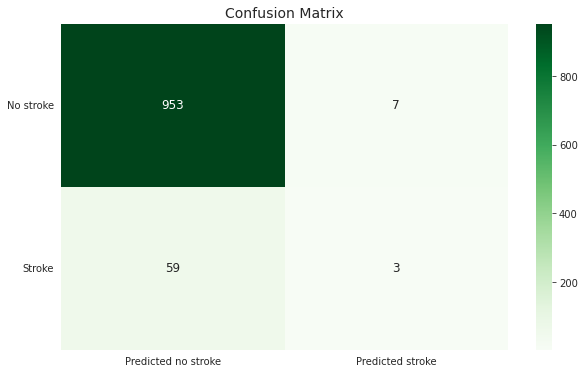

In [38]:
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix', fontsize=14)
sns.heatmap(cm, cmap = 'Greens', fmt = 'd',annot = True,annot_kws = {'fontsize': 12}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

Here we have completed modelling as well as tuning. The accuracy obtained is 93.5 %.

**Feel free to reach out to me, and leave your valuable comments and suggestions!** 

**Until next time!**